# Training Neural Networks with Pandas and PyTorch 

## 1. Pandas

Pandas is a powerful and widely-used Python library for data manipulation and analysis. It provides data structures like **DataFrames** and **Series** that are essential for working with structured data (e.g., CSV files, databases, and Excel files).

You can install Pandas using `pip` by running the following command in your terminal or command prompt:

In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


### Key Features of Pandas

- **DataFrame and Series Objects:** Pandas introduces two core data structures:
  - **Series:** A one-dimensional array with labeled indices.
  - **DataFrame:** A two-dimensional table (rows and columns) that can handle different data types (e.g., integers, strings, floats).
- **Data Handling:** You can easily handle missing data, filter, and clean your datasets using intuitive commands.
- **Data Analysis and Manipulation:** Pandas makes it simple to group, pivot, merge, and join datasets.

### Basic Usage Example

In [3]:
import pandas as pd

# Creating a DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Occupation': ['Engineer', 'Doctor', 'Artist']
}
df = pd.DataFrame(data)

# Viewing the DataFrame
print(df)

# Accessing a column
ages = df['Age']

# Filtering rows
adults = df[df['Age'] > 28]

# Summary statistics
summary = df.describe()
print(summary)

      Name  Age Occupation
0    Alice   25   Engineer
1      Bob   30     Doctor
2  Charlie   35     Artist
        Age
count   3.0
mean   30.0
std     5.0
min    25.0
25%    27.5
50%    30.0
75%    32.5
max    35.0


### Loading a CSV File

Pandas makes it easy to load and analyze data from CSV files. Here’s an example of how to load a CSV file using Pandas:

In [4]:
# Get CSV file from an incubator dataset
import sys
import os

# Get the current working directory.
current_dir = os.getcwd()

assert os.path.basename(current_dir) == '3-Physics-Modelling', 'Current directory is not 3-Physics-Modelling'

# Get the parent directory. Should be the root of the repository
parent_dir = os.path.dirname(current_dir)

# The root of the repo should contain the incubator_dt folder. Otherwise something went wrong in 0-Pre-requisites.
assert os.path.exists(os.path.join(parent_dir, 'incubator_dt')), 'incubator_dt folder not found in the repository root'

csv_file_path = os.path.join(parent_dir, 'incubator_dt', 'software', 'incubator', 'datasets', '20230501_calibration_empty_system', '20230501_calibration_empty_system.csv')

assert os.path.exists(csv_file_path), '20230501_calibration_empty_system.csv not found in the incubator repository.'

In [9]:
import pandas as pd

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Create a new column derived from another one, but converting from boolean to int.
df['heater_on_int'] = df['heater_on'].astype(int)

# Display the first few rows of the dataframe
df.head()

,time,t1,time_t1,t2,time_t2,t3,time_t3,average_temperature,heater_on,fan_on,execution_interval,elapsed,heater_on_int
0,1682912554273107499,23.062,1682912554192856639,24.312,1682912554232822932,22.125,1682912554272705263,23.6870,False,False,3.0,1.025402,0
1,1682912557313698460,23.062,1682912557272792494,24.375,1682912557232848441,22.125,1682912557313344724,23.7185,False,False,3.0,1.064928,0
2,1682912560282455551,23.062,1682912560232232220,24.375,1682912560192178595,22.062,1682912560282224276,23.7185,False,False,3.0,1.031638,0
3,1682912563313803672,23.125,1682912563273056592,24.375,1682912563232827969,22.062,1682912563313317234,23.7500,False,False,3.0,1.061013,0
4,1682912566283347240,23.125,1682912566243313892,24.375,1682912566192896637,22.062,1682912566282895616,23.7500,False,False,3.0,1.028555,0


In this example, we use the `pd.read_csv()` function to load the data into a Pandas DataFrame. The `df.head()` function shows the first few rows of the dataset.

### Plotting Data

Pandas integrates well with Matplotlib to provide easy-to-use plotting functionalities. Here's how to plot data from the CSV file:

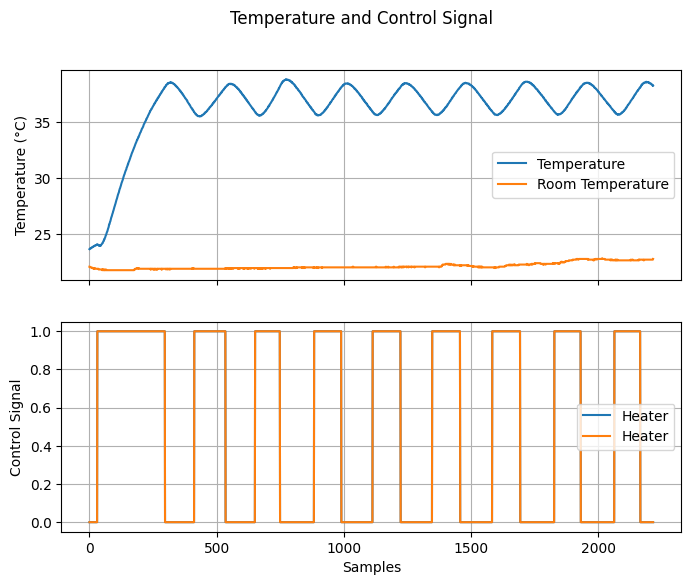

In [14]:
import matplotlib.pyplot as plt

# Create subplots with shared X-axis of the data to be used in training.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot temperature data on the first subplot
ax1.plot(df.index, df.average_temperature, label='Temperature')
ax1.plot(df.index, df.t3, label='Room Temperature')
ax1.set_ylabel('Temperature (°C)')
ax1.legend()

ax1.grid(True)

# Plot control signal data on the second subplot
ax2.plot(df.index, df.heater_on, label='Heater')
ax2.plot(df.index, df.heater_on_int, label='Heater') # just to verify that the conversion is correct
ax2.set_xlabel('Samples')
ax2.set_ylabel('Control Signal')
ax2.legend()

ax2.grid(True)

# Add a title to the shared X-axis
fig.suptitle('Temperature and Control Signal')

# Show the plots
plt.show()

## 2. PyTorch

**PyTorch** is an open-source machine learning framework primarily used for deep learning applications. It is known for its flexibility and dynamic computational graphs, which allow for efficient development and debugging.

### Installation

To install PyTorch, visit [https://pytorch.org](https://pytorch.org) and follow the instructions based on your operating system, preferred version, and whether or not you have a CUDA-capable GPU. 

### Key Features of PyTorch:
- **Tensors:** The core data structure in PyTorch is the tensor, which is similar to NumPy arrays but optimized for GPU-based operations.

- **Dynamic Computational Graphs:** PyTorch dynamically builds computation graphs at runtime, allowing for more flexibility in model development.

- **Neural Networks:** PyTorch provides a module called `torch.nn`, which simplifies building deep learning models like Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), etc.

- **Autograd:** PyTorch has automatic differentiation that helps compute gradients automatically for backpropagation in neural networks.

### Basic Usage Example

In [15]:
import torch
import torch.nn as nn

# Creating a tensor
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Performing tensor operations
y = torch.mean(x)

# Building a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        return self.fc1(x)

# Instantiating the model
model = SimpleNN()

# Forward pass with random input
input_data = torch.randn(1, 2)
output = model(input_data)
print(output)

tensor([[-0.2734]], grad_fn=<AddmmBackward0>)
